In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import requests
import json
import praw
import csv
from praw.models import MoreComments


reddit = praw.Reddit(
    client_id="d0vasTbqNkDHQQ", 
    client_secret="zjNHb4p2etJ__4VUQm6mw1dALOK6kQ",
    user_agent="sm-sentimentanalysis", 
    )

submission = reddit.submission(url="https://www.reddit.com/r/wallstreetbets/comments/ns8b2w/me_coming_back_to_wsb_after_a_100_loss_and_a_90/")

lst=[]
submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
    lst.append([comment.body,comment.created_utc])
    
df = pd.DataFrame(lst)
df.to_csv('test.csv',index=True)
print(df)


    

                                                     0             1
0    1st time PDT rule is a slap on the wrist. Just...  1.622829e+09
1    I feel like this perfectly encapsulates this p...  1.622822e+09
2    Welcome back!  Hopefully you spent the 90 days...  1.622823e+09
3    My new retarded dream is to get banned and the...  1.622829e+09
4    Im at about a 35% cash loss, so it is reassuri...  1.622823e+09
..                                                 ...           ...
943  Webull let's you.  I sell Stock A for 5k they ...  1.622844e+09
944  im praying for you, brother. i'll light a cand...  1.622838e+09
945  When I did it I told them I want my account to...  1.622835e+09
946  Thanks for the input fellow ape. Haven't tried...  1.622845e+09
947  Ok thanks again.  I will send them an email no...  1.622835e+09

[948 rows x 2 columns]


<class 'set'>


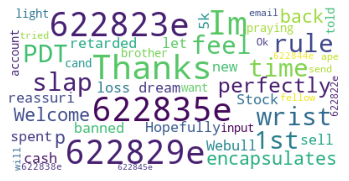

In [2]:
import matplotlib as mpl
import streamlit as st
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS


#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

for x in ["holding","fire","y'all","God","fuck",
          "pluto","really","someone","Thank","good",
          "hard","says","hollerin","Meh","Going","club",
          "days","moon","luck","scenario","Unnamed",
          "columns","anyway","lot","money","ca","LFG",
          "Well","t","money","aye", "said","lose","posts",
         "worth","every","seems","see","x","rows","unlikely"]:
    stopwords.add(x)
data = pd.read_csv("test.csv")

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data))


print(wordcloud)
print(type(stopwords))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)